In [2]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun
import torch.optim as optim

In [3]:
dry_run = False
epochs = 10
repeat_count = 100

Using genre from playlist source
Dups for 0-6:   1
Dups for 0-7:   1
Dups for 1-4:  10
Dups for 2-7:   3
Dups for 5-7:   1
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

Dataset creation finished in: 109.9891 seconds


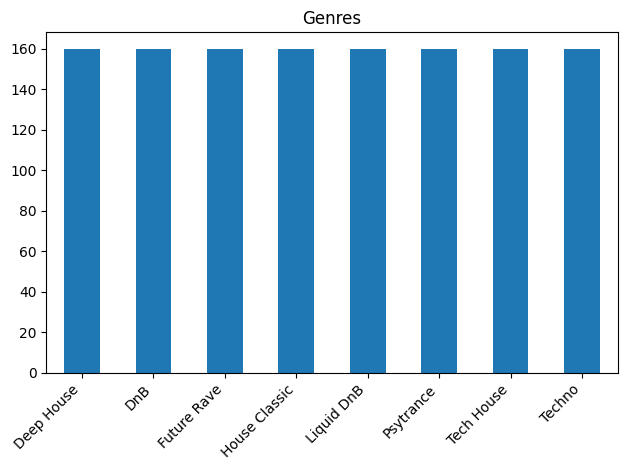

In [4]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(n_mels=128, win_length=1024),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        transform=create_crop((128, 128)),
        dry_run = dry_run,
        #max_frames=16000*60*2
)

analysis.summarize_dataset(dataset)

Starting training for 10 epoch


  0%|          | 0.00/10.0 [00:00<?, ?epochs/s]

Epoch   1/10, train_loss: 1.898, train_acc: 0.373, val_loss: 1.797, val_acc: 0.474, in 73.77s
Epoch   2/10, train_loss: 1.712, train_acc: 0.567, val_loss: 1.835, val_acc: 0.427, in 69.47s
Epoch   3/10, train_loss: 1.638, train_acc: 0.636, val_loss: 1.783, val_acc: 0.481, in 69.83s
Epoch   4/10, train_loss: 1.601, train_acc: 0.673, val_loss: 1.733, val_acc: 0.537, in 69.38s
Epoch   5/10, train_loss: 1.574, train_acc: 0.701, val_loss: 1.722, val_acc: 0.544, in 65.08s
Epoch   6/10, train_loss: 1.557, train_acc: 0.717, val_loss: 1.748, val_acc: 0.518, in 66.21s
Epoch   7/10, train_loss: 1.541, train_acc: 0.734, val_loss: 1.837, val_acc: 0.428, in 67.83s
Epoch   8/10, train_loss: 1.526, train_acc: 0.748, val_loss: 1.738, val_acc: 0.527, in 67.07s
Epoch   9/10, train_loss: 1.514, train_acc: 0.760, val_loss: 1.788, val_acc: 0.482, in 64.19s
Epoch  10/10, train_loss: 1.503, train_acc: 0.771, val_loss: 1.712, val_acc: 0.556, in 63.96s
Training finished in: 676.8010 seconds
test_loss: 1.653, tes

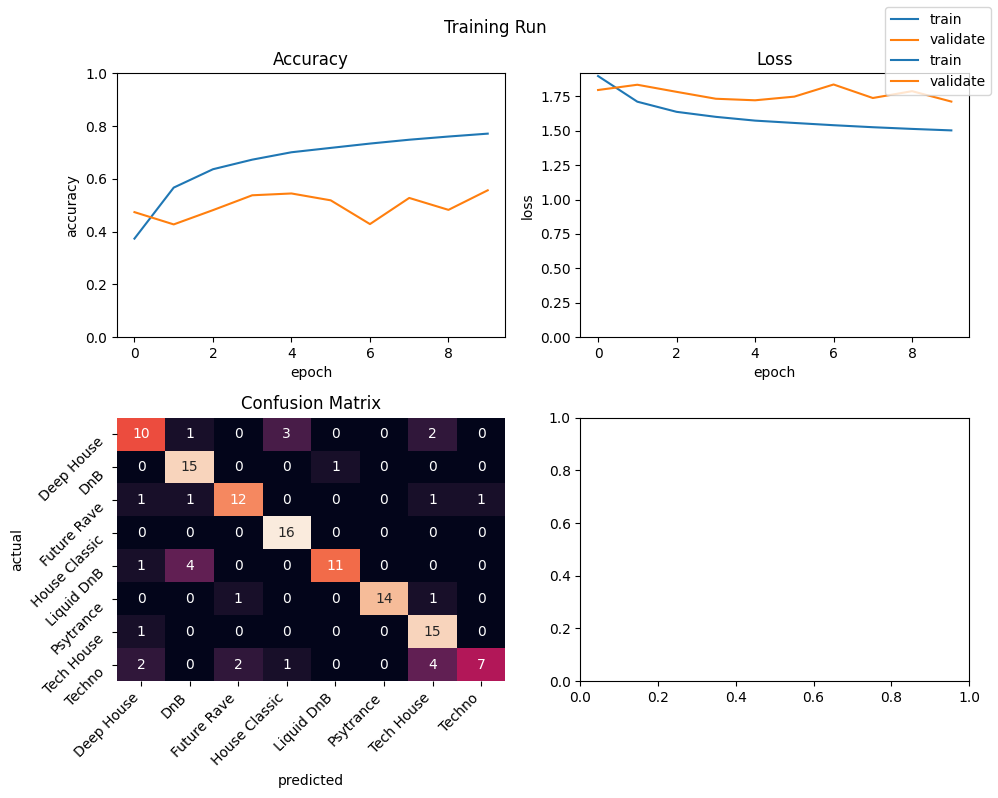

In [5]:
model = networks.ResNet(dataset.num_classes)
run = TrainingRun(dataset, model,
                  batch_size=64,
                  epochs=epochs,
                  dry_run=dry_run,
                  repeat_count=repeat_count,
                  optimizer=optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005))

run.start()
run.test()
run.plot()